In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Two Datasets, one contains Normal Tweets and One Contains Depressive tweets**



In [2]:
normal_tweets = pd.read_csv("Normal_Tweets.csv")

In [3]:
normal_tweets.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [4]:
depressive_tweets = pd.read_csv("depressive_tweets.csv")

In [5]:
depressive_tweets.head()

,Unnamed: 0,tweet.id,created_at,text,location,retweet,favorite
0,0,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
1,1,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0
2,2,1447807717859491842,2021-10-12 06:13:53,I feel a little hopeless. Anyone else? #hopele...,NaN,0,0
3,3,1448076026219692033,2021-10-13 00:00:03,"Which is more healthy? Hope, or hopelessness? ...","Denver, CO",0,0
4,4,1448382047375040513,2021-10-13 20:16:04,So someone tell me how do I get over #HOPELESS...,Portland Or .,0,2


In [6]:
depressive_tweets.shape

(24147, 7)

In [7]:
normal_tweets.shape

(10000, 6)

Dropping Unnecessary Columns

In [8]:
len(depressive_tweets["tweet.id"].unique())

18190

In [9]:
depressive_tweets.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
depressive_tweets.drop_duplicates(subset=["tweet.id"], inplace=True)

In [11]:
depressive_tweets.shape

(18190, 6)

In [12]:
depressive_tweets.isnull().sum()

tweet.id         0
created_at       0
text             0
location      6384
retweet          0
favorite         0
dtype: int64

In [13]:
normal_tweets.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

There are no missing values in the dataset

Creating two proper datasets for Normal Tweets and Depression Tweets and combining them in one

In [14]:
temp_depression = depressive_tweets[["text"]]

In [15]:
temp_depression

,text
0,Open discussion. Between the Transfer Portal a...
1,Plenty of things are changing in my life and t...
2,I feel a little hopeless. Anyone else? #hopele...
3,"Which is more healthy? Hope, or hopelessness? ..."
4,So someone tell me how do I get over #HOPELESS...
...,...
24142,Just got banned from a server F #sad
24143,I literally cried during my exam and the cam i...
24144,No one can be happy with a guy like me. That's...
24145,arrived at my house but Am I Home? #deep #sad ...


In [16]:
normal_tweets.drop(
    columns=["Tweet_ID", "Username", "Retweets", "Likes", "Timestamp"], inplace=True
)

In [17]:
normal_tweets.head()

,Text
0,Party least receive say or single. Prevent pre...
1,Hotel still Congress may member staff. Media d...
2,Nice be her debate industry that year. Film wh...
3,Laugh explain situation career occur serious. ...
4,Involve sense former often approach government...


In [18]:
normal_tweets.rename(columns={"Text": "text"}, inplace=True)

In [19]:
temp_normal = normal_tweets[["text"]]

In [20]:
temp_normal

,text
0,Party least receive say or single. Prevent pre...
1,Hotel still Congress may member staff. Media d...
2,Nice be her debate industry that year. Film wh...
3,Laugh explain situation career occur serious. ...
4,Involve sense former often approach government...
...,...
9995,Agree reflect military box ability ever hold. ...
9996,Born which push still. Degree sometimes contro...
9997,You day agent likely region. Teacher data mess...
9998,Guess without successful save. Particular natu...


In [21]:
temp_normal["label"] = pd.Series([0 for x in range(len(temp_normal.index))])

In [22]:
temp_depression["label"] = pd.Series([1 for x in range(len(temp_depression.text))])

C:\Users\yashd\AppData\Local\Temp\ipykernel_3900\3769295259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_depression["label"] = pd.Series([1 for x in range(len(temp_depression.text))])


In [23]:
temp_depression.loc[:, "label"] = pd.Series(
    [1 for x in range(len(temp_depression.index))], index=temp_depression.index
)

C:\Users\yashd\AppData\Local\Temp\ipykernel_3900\167876038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_depression.loc[:, "label"] = pd.Series(
C:\Users\yashd\AppData\Local\Temp\ipykernel_3900\167876038.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_depression.loc[:, "label"] = pd.Series(


In [24]:
temp_depression.head()

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1


In [25]:
temp_depression["label"] = temp_depression["label"].astype(int)

C:\Users\yashd\AppData\Local\Temp\ipykernel_3900\2172180572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_depression["label"] = temp_depression["label"].astype(int)


In [26]:
temp_depression

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1
...,...,...
24142,Just got banned from a server F #sad,1
24143,I literally cried during my exam and the cam i...,1
24144,No one can be happy with a guy like me. That's...,1
24145,arrived at my house but Am I Home? #deep #sad ...,1


In [27]:
temp_normal

,text,label
0,Party least receive say or single. Prevent pre...,0
1,Hotel still Congress may member staff. Media d...,0
2,Nice be her debate industry that year. Film wh...,0
3,Laugh explain situation career occur serious. ...,0
4,Involve sense former often approach government...,0
...,...,...
9995,Agree reflect military box ability ever hold. ...,0
9996,Born which push still. Degree sometimes contro...,0
9997,You day agent likely region. Teacher data mess...,0
9998,Guess without successful save. Particular natu...,0


In [28]:
final_data = pd.concat([temp_normal, temp_depression], ignore_index=True)

In [29]:
final_data

,text,label
0,Party least receive say or single. Prevent pre...,0
1,Hotel still Congress may member staff. Media d...,0
2,Nice be her debate industry that year. Film wh...,0
3,Laugh explain situation career occur serious. ...,0
4,Involve sense former often approach government...,0
...,...,...
28185,Just got banned from a server F #sad,1
28186,I literally cried during my exam and the cam i...,1
28187,No one can be happy with a guy like me. That's...,1
28188,arrived at my house but Am I Home? #deep #sad ...,1


In [30]:
final_data.shape

(28190, 2)

In [31]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
pip install ftfy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import re
import ftfy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def clean_tweet(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = tweet.lower()

        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 5:

            # removing hashtag, @mention, emoji and image URLs
            tweet = " ".join(
                re.sub(
                    "(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)",
                    " ",
                    tweet,
                ).split()
            )

            # fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)

            # remove punctuation
            tweet = " ".join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            # stop words and lemmatization
            stop_words = set(stopwords.words("english"))
            word_tokens = nltk.word_tokenize(tweet)

            lemmatizer = WordNetLemmatizer()
            filtered_sentence = [
                lemmatizer.lemmatize(word)
                for word in word_tokens
                if not word in stop_words
            ]
            # back to string from list
            tweet = " ".join(
                filtered_sentence
            )  # join words with a space in between them

            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [34]:
arr = [x for x in final_data["text"]]
cleaned_column = clean_tweet(arr)

In [35]:
final_data["cleaned_tweet"] = cleaned_column

In [36]:
final_data.head()

,text,label,cleaned_tweet
0,Party least receive say or single. Prevent pre...,0,party least receive say single prevent prevent...
1,Hotel still Congress may member staff. Media d...,0,hotel still congress may member staff medium d...
2,Nice be her debate industry that year. Film wh...,0,nice debate industry year film generation push...
3,Laugh explain situation career occur serious. ...,0,laugh explain situation career occur serious f...
4,Involve sense former often approach government...,0,involve sense former often approach government...


In [37]:
final_data.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [38]:
final_data[final_data["cleaned_tweet"].isnull()]

,text,label,cleaned_tweet
10067,"You are there for them, but they are not there...",1,NaN
10881,Why me? \n\n#depression #depressed #sad #cry #...,1,NaN
11142,that’s IT! i’m #depressed,1,NaN
12037,When your #anxiety has #anxiety 😖,1,NaN
15073,I have #anxiety,1,NaN
15143,Just down.🙁 #mentalhealth #ADD #anxiety #BPD #...,1,NaN
15731,#Legalize the #cure to #depression and #anxiet...,1,NaN
18725,Be You ✨ #mentalhealth,1,NaN
19294,How do you do?\n#Poll #EnglishClass #Literatur...,1,NaN
19868,#exercise and #meditation or #depression? #w...,1,NaN


In [39]:
final_data.dropna(subset=["cleaned_tweet"], inplace=True)

In [40]:
final_data[final_data["cleaned_tweet"].isnull()]

,text,label,cleaned_tweet


In [41]:
from nltk import pos_tag

In [42]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yashd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
depressive_tweets_arr = [x for x in temp_depression['text']]
random_tweets_arr = [x for x in temp_normal['text']]
dep_list = clean_tweet(depressive_tweets_arr)
normal_list = clean_tweet(random_tweets_arr)

In [44]:

def getadjectives(tweet):
    tweet = nltk.word_tokenize(tweet)   
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]   
    return " ".join(tweet)   


In [45]:
tweets_long_string = [getadjectives(x) for x in dep_list]
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [46]:
from collections import Counter
counts = Counter(tweets_list)
dep_word_list = pd.DataFrame.from_dict(counts, orient='index').reset_index()
dep_word_list.columns = ['Words', 'Count']
dep_word_list.sort_values(by='Count', ascending=False, inplace=True)

In [47]:
dep_word_list.head()

,Words,Count
32,mental,1247
31,good,773
23,u,594
9,much,465
143,new,459


In [48]:
tweets_long_string = [getadjectives(x) for x in normal_list]
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [49]:
from collections import Counter
counts = Counter(tweets_list)
normal_word_list = pd.DataFrame.from_dict(counts, orient='index').reset_index()
normal_word_list.columns = ['Words', 'Count']
normal_word_list.sort_values(by='Count', ascending=False, inplace=True)

In [50]:
normal_word_list.head()

,Words,Count
147,senior,394
69,young,392
94,high,391
63,able,384
4,successful,379


In [51]:
def data_dis(dataFile):
    return sns.countplot(x="label", data=dataFile, palette="hls")

<Axes: xlabel='label', ylabel='count'>

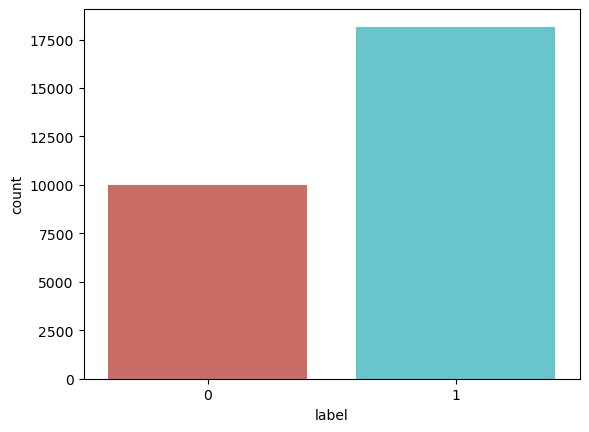

In [52]:
sns.countplot(x="label", data=final_data, palette="hls")

In [53]:
!pip install spacy

In [54]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.4.0/en_core_web_lg-3.4.0.tar.gz

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     --------------------------------------- 1.0/587.7 MB 20.0 MB/s eta 0:00:30
     --------------------------------------- 3.0/587.7 MB 31.9 MB/s eta 0:00:19
     --------------------------------------- 5.0/587.7 MB 35.2 MB/s eta 0:00:17
     --------------------------------------- 7.0/587.7 MB 37.1 MB/s eta 0:00:16
      -------------------------------------- 8.9/587.7 MB 38.2 MB/s eta 0:00:16
      ------------------------------------- 10.9/587.7 MB 43.7 MB/s eta 0:00:14
      ------------------------------------- 13.0/587.7 MB 43.7 MB/s eta 0:00:14
      ------------------------------------- 14.8/587.7 MB 43.7 MB/s eta 0:00:14
     - ------------------------------------ 16.8/587.7 MB 43.5 MB/s eta 0:00:14
     - ------------------------------------ 18.8/587.7 MB 43.5 MB/s eta 0:00:14
     - ------------------------------------ 20.8/587.7 MB 43.5 MB/s eta 0:00:14
     - ------------------------------------ 22.

In [55]:
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data.head()

,text,label,cleaned_tweet
0,Method moment phone. Ready level occur behavio...,0,method moment phone ready level occur behavior...
1,"""I’m sorry for coming to your life i know i ru...",1,sorry coming life know ruined
2,I have no reason to live. so I'll just end it...,1,reason live end
3,Media majority film condition. Card however ne...,0,medium majority film condition card however ne...
4,Somedays it seems impossible to survive. Bust...,1,somedays seems impossible survive busting as k...


In [56]:
# !python3 -m spacy download en_core_web_lg

In [57]:
data = pd.read_csv("final_data.csv", sep="\t")

In [58]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [59]:
## word-embedding
all_vectors = np.array(
    [
        np.array([token.vector for token in nlp(s)]).mean(axis=0) * np.ones((300))
        for s in data["clean_text"]
    ]
)

In [61]:
from sklearn.model_selection import train_test_split

Y = data["label"]
X = all_vectors

validation_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=validation_size, random_state=40
)

In [62]:
# Create a svm Classifier
from sklearn.svm import SVC

clf = SVC(probability=True)

In [63]:
from sklearn.metrics import accuracy_score

res = clf.fit(X_train, Y_train)
train_result = accuracy_score(res.predict(X_train), Y_train)
test_result = accuracy_score(res.predict(X_test), Y_test)

In [64]:
print("train_result:", "test_result:", train_result, test_result, sep=" ")

train_result: test_result: 0.8931000971817298 0.8489229024943311


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report as skm
from sklearn.metrics import classification_report


def conf_matrix_acc(y_true, y_pred):
    ## Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title="Confusion matrix",
    )
    plt.yticks(rotation=0)
    print("=========================================")
    print(f"Accuracy score is : {accuracy_score(y_true, y_pred)}")
    print("=========================================")
    print("Detail:")
    print(classification_report(y_true, y_pred))

Accuracy score is : 0.8489229024943311
Detail:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3631
           1       0.85      0.83      0.84      3425

    accuracy                           0.85      7056
   macro avg       0.85      0.85      0.85      7056
weighted avg       0.85      0.85      0.85      7056



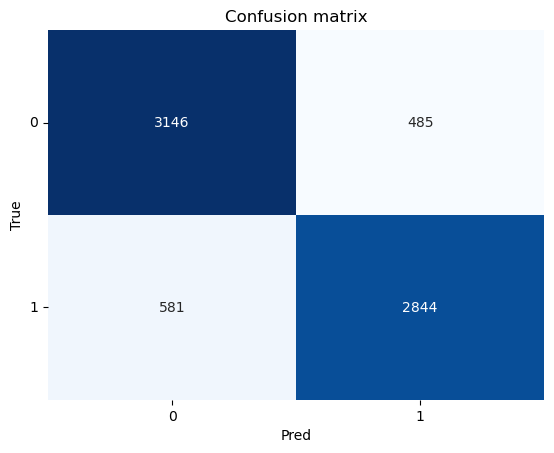

In [66]:
y_pred_svm = res.predict(X_test)
classes = np.unique(Y_test.to_list())
y_test_array = pd.get_dummies(Y_test, drop_first=False).values
probs = res.predict_proba(X_test)
conf_matrix_acc(Y_test.to_list(), y_pred_svm)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Create a decision tree classifier and fit it to the training data
Y = data["label"]
X = all_vectors

validation_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=validation_size, random_state=40
)

In [69]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

Accuracy score is : 0.7341269841269841
Detail:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3631
           1       0.72      0.73      0.73      3425

    accuracy                           0.73      7056
   macro avg       0.73      0.73      0.73      7056
weighted avg       0.73      0.73      0.73      7056



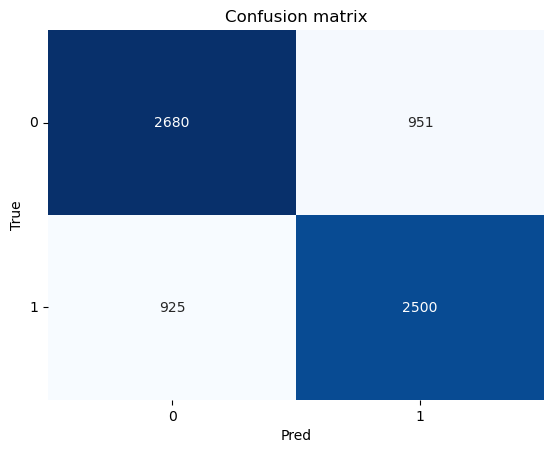

In [70]:
y_pred_dt = clf.predict(X_test)
classes = np.unique(Y_test.to_list())
y_test_array = pd.get_dummies(Y_test, drop_first=False).values
probs = clf.predict_proba(X_test)
conf_matrix_acc(Y_test.to_list(), y_pred_dt)

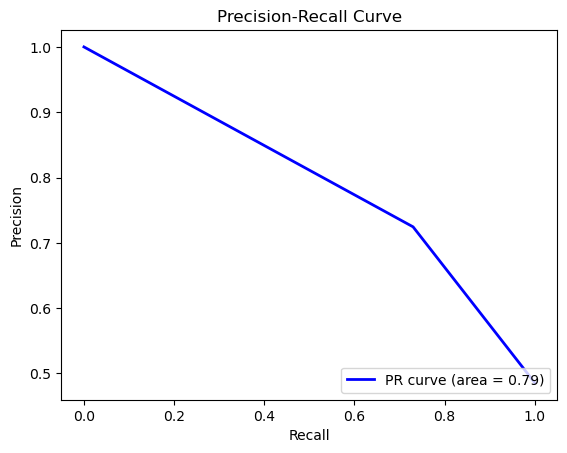

In [75]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(Y_test, y_pred_dt)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()